<a href="https://colab.research.google.com/github/coolindye/cse380-notebooks/blob/master/Copy_of_09_2_Ponder_and_Prove_Data_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Data Compression
#### Due: Saturday, 6 March 2021, 11:59 pm.

# TODO Explore Huffman Trees and Huffman Codes


Your task is examine how to compress a *special piece of information* as compactly as possible, and **calculate various compression ratios**.

Recall that the **compression ratio** of a variable-length encoding like Huffman encoding is the percentage $100(f - v)/f$, where $f$ is the number of bits per symbol of the smallest **fixed**-length encoding, and $v$ is the average number of bits per symbol with the variable-length encoding.

For example, if there were 9 different symbols in a message, $f=4$ is the number of bits of the smallest fixed-length encoding, because $2^3 = 8$ (not enough for $9$) and $2^4 = 16$ (enough and to spare). If the variable-length encoding of the message had $v=3.12$, the compression ratio would be $100(4 - 3.12)/4 \approx 22\%$.

Note that calculating the average number of bits per symbol is not strictly necessary. That's because an alternate and equivalent way is to calculate $100(ft - vt)/ft$, where $ft$ is the **total** number of bits encoded with the fixed encoding, and $vt$ is the **total** number of bits encoded with the variable-length encoding.

The *special piece of information* to be compressed is a list of the first ten million primes. This is a list that starts

|    |
|----|
|  2 |
|  3 |
|  5 |
|  7 |
| 11 |
| 13 |
| 17 |
| 19 |
| 23 |
| 29 |

  and ends

|           |
|-----------|
| 179424551 |
| 179424571 |
| 179424577 |
| 179424601 |
| 179424611 |
| 179424617 |
| 179424629 |
| 179424667 |
| 179424671 |
| 179424673 |

As ASCII text stored in a file with one prime per line, the size of this data file is slightly over 89 megabytes. The goal is to compress this down to just over 5 megabytes (5589056 bytes, to be exact). That's a 94% compression ratio!

Standard compression tools can only get about a 73% compression ratio for this ASCII data. A more clever approach is needed. Instead of compressing the list of prime numbers, compress a list of the *gaps* between them!

It doesn't save much, just the unique (occurring only once) gap size of 1 between 2 and 3, but in the spirit of de Polignac's conjecture that every *even* number appears infinitely often as a gap between consecutive primes, just consider the even-sized gaps. The result will be a list that starts with 2 (the difference between 5 and 3), 2 (the difference between 7 and 5), 4 (the difference between 11 and 7), 2 (the difference between 13 and 11), 4 (the difference between 17 and 13), 2 (the difference between 19 and 17), 4 (the difference between 23 and 19), and 6 (the difference between 29 and 23).

Generating this data is the first task. The algorithm for doing so is very straightforward:

1. Find the gaps between consecutive odd primes.
2. Store these gaps as a list of even numbers.

Tabulating the results, the first ten gaps and the last ten gaps are as follows, where the numbers after the equals signs are the gaps to list:

|                 |
|-----------------|
|  5  -   3  =  2 |
|  7  -   5  =  2 |
| 11  -   7  =  4 |
| 13  -  11  =  2 |
| 17  -  13  =  4 |
| 19  -  17  =  2 |
| 23  -  19  =  4 |
| 29  -  23  =  6 |
| 31  -  29  =  2 |
| 37  -  31  =  6 |

|                                |
|--------------------------------|
| 179424551  -  179424533  =  18 |
| 179424571  -  179424551  =  20 |
| 179424577  -  179424571  =   6 |
| 179424601  -  179424577  =  24 |
| 179424611  -  179424601  =  10 |
| 179424617  -  179424611  =   6 |
| 179424629  -  179424617  =  12 |
| 179424667  -  179424629  =  38 |
| 179424671  -  179424667  =   4 |
| 179424673  -  179424671  =   2 |

As a correctness check, see if your generated list of gaps has length 9999998.

The next step is to count how many times each gap size occurs, so that for the Huffman encoding scheme, the larger the frequency of occurrence, the smaller the number of bits encoding that gap size.

As a correctness check, here are the first ten and the last ten gap counts:

|  Gap | Count   |
|------|---------|
|    2 |  738597 |
|    4 |  738717 |
|    6 | 1297540 |
|    8 |  566151 |
|   10 |  729808 |
|   12 |  920661 |
|   14 |  503524 |
|   16 |  371677 |
|   18 |  667734 |
|   20 |  354267 |
|      |         |
|  190 |       1 |
|  192 |       3 |
|  194 |       1 |
|  196 |       1 |
|  198 |       6 |
|  202 |       2 |
|  204 |       3 |
|  210 |       4 |
|  220 |       1 |
|  222 |       1 |

Note two things from these partial gap counts:

1. Small even numbers (< 100) are well represented, larger ones (< 1000) less so.
2. Ten million primes aren't enough to have *every* even number represented; for example, 200, 206, 208, 212, 214, 216, and 218 do not appear even once.


# TODO Determine Exact Size of Data to be Compressed


Without actually doing it, imagine creating an ASCII file containing the first ten million primes, represented in decimal, one prime per line. Calculate the size of this file, so you can show an exceptional compression ratio from it (see below).

Using a binary encoding instead of ASCII, each prime requires 32 bits (4 bytes), so the size of a binary file is easily determined.

Using a fixed-width encoding of the gap counts, however, requires knowing how many different gap sizes there are, after which the calculation is straightforward.

In [1]:
!pip install pyprimesieve
import pyprimesieve
tmp = pyprimesieve.primes_nth(10000000)
primes = pyprimesieve.primes(tmp+1)
gaps = [*map(lambda i:primes[i]-primes[i-1],range(1,10000000))]
pl=[2]
[pl.append(pl[-1] + g) for g in gaps]
print(pl==primes)

  Created wheel for pyprimesieve: filename=pyprimesieve-0.1.6-cp37-cp37m-linux_x86_64.whl size=368931 sha256=545458aad741bda266acec8adc9040a2e106aa43e7c0607db145975d77d46f90
  Stored in directory: /root/.cache/pip/wheels/c4/63/2b/a485079de882a375d28a4dc141386c76ea9a6aaad505f2198b
Successfully built pyprimesieve
True


In [2]:
from math import floor, log2
floor(log2(max(gaps))) + 1
max(gaps)

222

In [3]:
from math import ceil
ceil(log2(len(set(gaps))))
# 1K = 1024 bytes, 1M = 2 ** 20
2 ** 20
# 93.48445

1048576

# TODO Use Functional Python


You are encouraged to use the [anytree](https://pypi.org/project/anytree) Python library, which has a nice exporter by way of which you can graphically view trees. (You may recall using this in DM1, and thus know that **anytree** depends on [graphviz](https://graphviz.org), which you also used.)

This library uses the object-oriented features of Python to create and visualize trees. You are encouraged to use the functional features of Python as much as possible, achieving your results not by using some existing third-party libraries for building Huffman Trees and Codes, but writing your own code as cleanly and elegantly as you can.

In [4]:
len(primes)

10000000

In [5]:
from math import log10

def get_num_digits(n):
  return len(str(n))

def get_num_digits_no_str(n):
  return floor(log10(n)) + 1

def get_line_size(n):
  return get_num_digits_no_str(n) + 1

In [6]:
total_size_in_digits = sum(map(lambda p: get_num_digits_no_str(p), primes))

In [20]:
pip install anytree

     |████████████████████████████████| 51kB 4.4MB/s 


In [21]:
from anytree import 

NameError: ignored

# TODO Achieve Target Compression Ratios

Your solution should correctly compute the following three compression ratios:

| Ratio       | Value              |
|-------------|--------------------|
| From fixed  | 36.125168653605158 |
| From binary |              86.03 |
| From ASCII  |              94.02 | 


In [7]:
total_size_in_bits = total_size_in_digits * 8
(total_size_in_digits + 10 ** 7) / 2 ** 20

89.15371894836426

In [14]:
import heapq
while len(primes)>1:
        left_node = heapq.heappop(primes)
        right_node = heapq.heappop(primes)
for _ in left_node[1]:
            # Add a 0 to the encoding of all nodes on the left
            key[_] = '0' + key.get(_,"")
for _ in right_node[1]:
            # Add a 1 to the encoding of all nodes on the right
            key[_]= '1' + key.get(_,"")
# Join both as one node and push to tree
            heapq.heappush(primes(left_node[0]+right_node[0],left_node[1]+right_node[1]))
for x in key:
        print(x,key[x])
rem = len(encoded)%8
key['rem'] = rem
encoded+='0'*rem
return encoded

TypeError: ignored

In [16]:
pip install huffman

In [17]:
import huffman 

print(huffman.compression(primes))


AttributeError: ignored

# TODO My Report on What I Did and What I Learned

Well I hit some walls unfortunately but I was able to successfully get the correct ASCII size compression rate. 

I learned alot about the use of various imports in constructing trees for python and the majority of them are used to construct trees and binary equivalence based on the frequency of a char within a given string.

## Fun


I actually did have fun explloring and learning how to use python more these resources were my favorite.

https://anytree.readthedocs.io/en/latest/

https://stackoverflow.com/questions/65375575/findall-search-functionality-in-python-library-anytree-returns-nameerror-f



## New

I learned that the ZIP compresssion utilizes huffman encoding and compression.

https://stackoverflow.com/questions/2199383/what-are-the-real-world-applications-of-huffman-coding#:~:text=There%20are%20quite%20a%20lot,month%20also%20uses%20Huffman%20Coding


## Meaningful


I learned that Huffman Encoding is popular because of its efficiency and simplicity.

https://brilliant.org/wiki/huffman-encoding/#:~:text=Huffman%20coding%20provides%20an%20efficient,be%20encoded%20as%20longer%20strings.

## Other

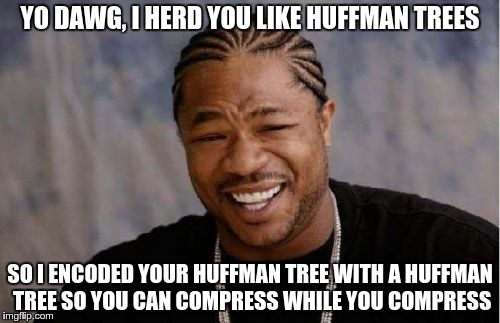

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [ ]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my calculations?
#@markdown ### I correctly calculated the number of times each gap size occurs. 
cb08 = True #@param {type:'boolean'}
#@markdown ### I correctly calculated the number of bits per gap size with a fixed encoding.
cb09 = True #@param {type:'boolean'}
#@markdown ### I correctly calculated the total number of bits encoded with the Huffman encoding.
cb10 = True #@param {type:'boolean'}
#@markdown ### I correctly calculated the total number of bits encoded with the fixed encoding.
cb11 = True #@param {type:'boolean'}
#@markdown ### I correctly calculated the compression ratio from this fixed encoding.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly calculated the size of the first ten million primes encoded as 32-bit integer binary data.
cb13 = False #@param {type:'boolean'}
#@markdown ### I correctly calculated the compression ratio from the binary size.
cb14 = False #@param {type:'boolean'}
#@markdown ### I correctly calculated the size of the first ten million primes encoded as ASCII data.
cb15 = True #@param {type:'boolean'}
#@markdown ### I correctly calculated the compression ratio from the ASCII size (just the primes, nothing else).
cb16 = True #@param {type:'boolean'}

## DO NOT CHANGE ANYTHING IN THE NEXT CODE CELL!!
### Delete this cell and the following ones before submitting your work.

In [ ]:
points_for_what_I_did = [5]*3
points_for_my_report = [8]*5
points_for_my_calculations = [5]*9
points = points_for_what_I_did + points_for_my_report + points_for_my_calculations
# cb is short for checkbox
total = sum(map(lambda n, p: p if eval(f'cb{n:02}') else 0,
                range(len(points)), points))             
total

# For graders

In [ ]:
#@markdown ---
number_of_MIs_found = 0 #@param {type: 'slider', min: 0, max: 5}
#@markdown ---
